In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
#построение окружности

In [3]:
z1 = pd.DataFrame(np.arange(360), columns=['angle'])

In [4]:
z1

,angle
0,0
1,1
2,2
3,3
4,4
...,...
355,355
356,356
357,357
358,358


In [5]:
z1['x'] = z1['angle'].apply(lambda x: 100*np.sin(np.pi*2*x/360) + np.random.uniform(-10,10))

In [6]:
z1

,angle,x
0,0,-4.059762
1,1,5.417766
2,2,0.541753
3,3,-3.973640
4,4,2.038977
...,...,...
355,355,-10.466049
356,356,1.030004
357,357,-12.466652
358,358,-9.995623


<AxesSubplot:xlabel='angle', ylabel='x'>

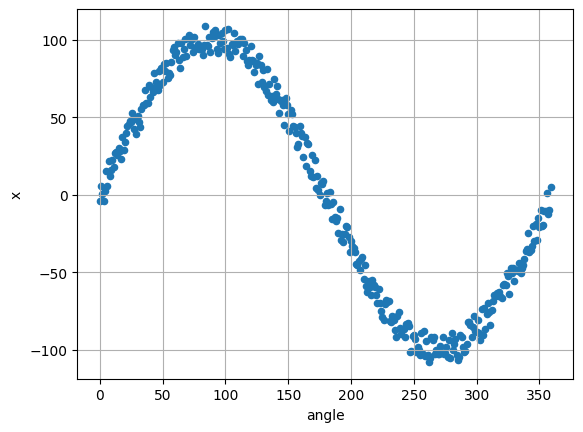

In [7]:
z1.plot(x='angle', y='x', kind='scatter', grid=True, alpha=1)

In [8]:
np.sin(np.pi)

1.2246467991473532e-16

In [9]:
z1['y'] = z1['angle'].apply(lambda x: 100*np.cos(np.pi*2*x/360) + np.random.uniform(-10,10))

<AxesSubplot:xlabel='angle', ylabel='y'>

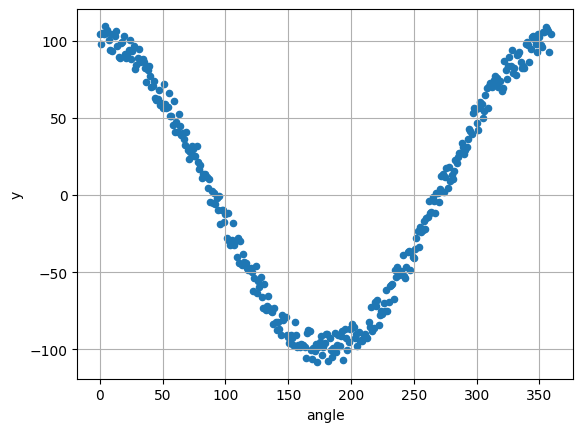

In [10]:
z1.plot(x='angle', y='y', kind='scatter', grid=True, alpha=1)

<AxesSubplot:xlabel='x', ylabel='y'>

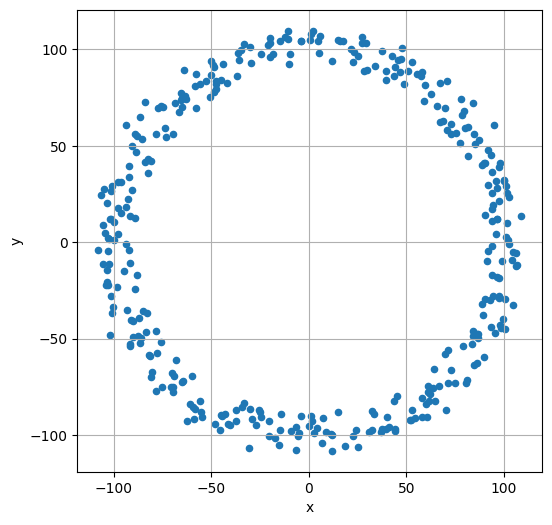

In [11]:
z1.plot(x='x', y='y', kind='scatter', grid=True, alpha=1, figsize=(6,6))

In [12]:
z1['t'] = 0

In [13]:
z1

,angle,x,y,t
0,0,-4.059762,104.224040,0
1,1,5.417766,98.014314,0
2,2,0.541753,104.967038,0
3,3,-3.973640,104.383088,0
4,4,2.038977,109.737924,0
...,...,...,...,...
355,355,-10.466049,109.341703,0
356,356,1.030004,107.798740,0
357,357,-12.466652,106.415752,0
358,358,-9.995623,92.584289,0


In [14]:
#круг для данных типа 1

In [15]:
z2 = pd.DataFrame(np.arange(360), columns=['angle'])

In [16]:
z2['x'] = z2['angle'].apply(lambda x: 75*np.sin(np.pi*2*x/360) + np.random.uniform(-15,15))

In [17]:
z2['y'] = z2['angle'].apply(lambda x: 75*np.cos(np.pi*2*x/360) + np.random.uniform(-15,15))

In [18]:
z2['t'] = 1

<AxesSubplot:xlabel='x', ylabel='y'>

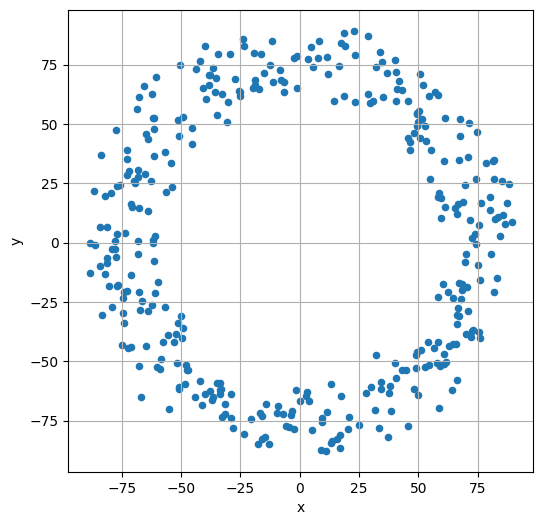

In [19]:
z2.plot(x='x', y='y', kind='scatter', grid=True, alpha=1, figsize=(6,6))

In [20]:
z33 = pd.concat([z1, z2]).reset_index().drop('index', axis=1)

In [21]:
z33

,angle,x,y,t
0,0,-4.059762,104.224040,0
1,1,5.417766,98.014314,0
2,2,0.541753,104.967038,0
3,3,-3.973640,104.383088,0
4,4,2.038977,109.737924,0
...,...,...,...,...
715,355,3.313951,77.174473,1
716,356,-18.887078,66.288744,1
717,357,-18.850434,68.288757,1
718,358,-16.426657,79.594445,1


In [22]:
z33 = shuffle(z33, random_state=12345).reset_index()

In [23]:
z33

,index,angle,x,y,t
0,589,229,-49.485031,-40.209328,1
1,578,218,-34.817958,-59.052220,1
2,616,256,-74.633753,-29.580996,1
3,682,322,-35.022975,53.755092,1
4,557,197,-33.676846,-58.998971,1
...,...,...,...,...,...
715,420,60,74.864486,46.570106,1
716,129,129,72.922602,-66.248330,0
717,285,285,-106.489421,24.428473,0
718,485,125,69.973401,-38.604320,1


<AxesSubplot:xlabel='x', ylabel='y'>

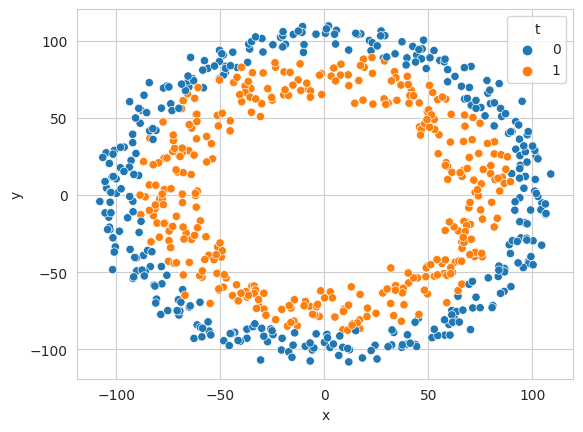

In [24]:
sns.set_style("whitegrid")
sns.scatterplot(data=z33, x='x', y='y', hue='t')

In [25]:
#test

In [26]:
target = z33['t']

In [27]:
target.shape

(720,)

In [28]:
features = z33[['x', 'y']]

In [29]:
features.shape

(720, 2)

### модель - случайный лес

In [30]:
#логарифмическая сетка параметров для модели Случайный Лес
params = {
    'n_estimators':[40,80], 
    'max_depth':[16, 32], 
    'min_samples_split':[2], 
    'min_samples_leaf':[2]
}

In [31]:
rf = RandomForestClassifier(random_state=12345, class_weight='balanced')

In [32]:
clf = GridSearchCV(rf, params, scoring='f1', cv=5, n_jobs=-1)

In [33]:
%%time
clf.fit(features, target)

CPU times: user 266 ms, sys: 55.6 ms, total: 321 ms
Wall time: 8.99 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [40, 80]},
             scoring='f1')

In [34]:
clf.best_score_

0.9389718313106847

In [35]:
clf.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

### модель - SVM

In [36]:
C_range = np.logspace(-2, 4, 7)#13)
gamma_range = np.logspace(-4, 2, 7)#13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [37]:
regr = svm.SVC()

In [38]:
clf = GridSearchCV(regr, param_grid=param_grid, cv=5, n_jobs=-1)

In [39]:
%%time
clf.fit(features, target)

CPU times: user 364 ms, sys: 9.35 ms, total: 374 ms
Wall time: 10.6 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [40]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (clf.best_params_, clf.best_score_)
)

The best parameters are {'C': 100.0, 'gamma': 0.0001} with a score of 0.97
